<img src="../.images/logosnb.png" alt="Banner" style="width:800px;"/>

<div style='color: #690027;' markdown="1">
<h1>BINARY CLASSIFICATION WITH NEURAL NETWORK WITH A HIDDEN LAYER</h1></div>

<div class="alert alert-box alert-success">
In this notebook, you will build a neural network using the functionalities of the Python module Keras. The problem is one of <b>binary classification</b>: dividing data into two classes. The classes are not linearly separable.<br>In the network, you use <b>activation functions</b>, specifically the ReLU and sigmoid functions. These are non-linear functions. ReLU is a commonly used activation function, which enables the separation of classes that are not linearly separable.</div>

### Importing the necessary modules

In this notebook, you build a *'Sequential model'* using Keras. This is a model that consists of *consecutive layers*.You will work with an input layer, an output layer, and one hidden layer in between.<br>So you will need to be able to create the model and the layers.

In [1]:
import pandas as pd
import matplotlib.pyplot as pltimport numpy as np
from keras import modelsfrom keras import layersfrom keras import optimizers
from sklearn.utils import shuffle    # to be able to exchange data with each other

Using TensorFlow backend.


You will be working with 60 given points in the plane. Some points are blue, others are green. The points represent two classes. <br> The coordinate and color of each point is given. <br>The intention is to separate the green and blue points from each other.

<div style='color: #690027;' markdown="1">
<h2>1. Reading the data</h2></div>

Read the dataset using the `pandas` module.

In [2]:
points = pd.read_csv("parabolas.dat")  # table to be read does not have a header

<div style='color: #690027;' markdown="1">
<h2>2. Displaying the read data</h2></div>

View the data by executing the `points` instruction. The dataset consists of the x and y coordinates of the points and the color of each point. <br>The x and y coordinates are features, the color is a label. <br> Because there are two types of labels, it is said that the points are distributed over **two classes**.

In [3]:
points

,x,y,kleur
0,-20,900,blauw
1,-18,824,blauw
2,-16,756,blauw
3,-14,696,blauw
4,-12,644,blauw
5,-10,600,blauw
6,-8,564,blauw
7,-6,536,blauw
8,-4,516,blauw
9,-2,504,blauw


This table is a table with 60 rows and 3 columns: after all, there are 60 points, 2 features and 1 label. <br><br>The characteristics:- first column: x-coordinate;- second column: y-coordinate.
The label:- third column: color.

<div class="alert alert-box alert-info">
In machine learning, two features are typically represented by x1 and x2, and the label by y.</div>

<div style='color: #690027;' markdown="1">
<h2>3. Investigate whether the points can be separated from each other</h2></div>

You can see best on a graph whether points are separable.

To visualize the data, you need the x and y coordinates, so the features x1 and x2, of the points.<br>In addition, you also have to consider the color.

<div style='color: #690027;' markdown="1">
<h3>3.1 Preparing the data</h3></div>

In [4]:
x1 = points["x"]x2 = points["y"]y = points["color"]

In [5]:
x1 = np.array(x1)x2 = np.array(x2)

In [6]:
# display labels numericallyy[y == 'blue'] = 0y[y == 'green'] = 1

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
print(y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
Name: kleur, dtype: object


In [8]:
# standardize data pointsx1 = (x1 - np.mean(x1))/np.std(x1)x2 = (x2 - np.mean(x2))/np.std(x2)
X = np.stack((x1, x2), axis=1)    # correct format, axis=1 sets x1 and x2 as columns
# to remember for the test setmean1 = np.mean(x1)std1 = np.std(x1)mean2 = np.mean(x2)std2 = np.std(x2)

<div style='color: #690027;' markdown="1">
<h3>3.2 Displaying the data in standardized scatter plot</h3></div>

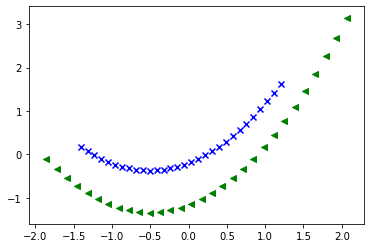

In [9]:
plt.figure()
plt.scatter(x1[:30], x2[:30], color="blue", marker="x")plt.scatter(x1[30:], x2[30:], color="green", marker="<")
plt.show()

The points are not linearly separable but are separable by a curve.

In [10]:
X, y = shuffle(X, y)                 # features and classes remain together

<div style='color: #690027;' markdown="1">
<h2>4. Structure of a neural network</h2></div>

<div style='color: #690027;' markdown="1">
<h3>4.1 Preparing the data</h3></div>

So first you check whether the data is in the correct format. This is not the case for the labels. They are words instead of 0 and 1. <br>You previously asked for the shape of the tensor X with `X.shape`. The output was (15,2). That means that X is a tensor with 15 vectors of dimension 2.

In [11]:
# split into training and validation data# to take from shuffled datax1 = X[:, 0]x2 = X[:, 1]
x1_val = np.append(x1[0:5],x1[30:35])x2_val = np.append(x2[0:5],x2[30:35])X_val = np.stack((x1_val, x2_val), axis=1)    # correct format, axis=1 sets x1 and x2 as columnsx1_train = np.append(x1[5:30], x1[35:])x2_train = np.append(x2[5:30], x2[35:])X_train = np.stack((x1_train, x2_train), axis=1)

In [12]:
X_train.shape

(50, 2)

In [13]:
X_val.shape

(10, 2)

In [14]:
y_val =  np.append(y[0:5], y[30:35])y_train = np.append(y[5:30], y[35:])

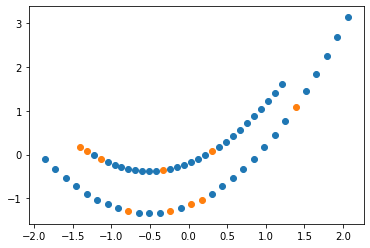

In [15]:
# displaying training and validation setplt.scatter(X_train[:,0],X_train[:,1])plt.scatter(X_val[:,0],X_val[:,1])

<div style='color: #690027;' markdown="1">
<h3>4.2 Architecture of the neural network</h3></div>

Your model for the network is a ***Sequential model*** that consists of linked layers: an *input layer*, an *output layer* and in between a *hidden layer*. <br>You use *dense layers*. This means that they are *fully connected* layers: the neurons in a certain layer are connected to all neurons in the previous layer.<br>In each layer, you have to choose the **number of output neurons** for that layer. <br>For the output layer, that is fixed: there are **two categories**, labeled 0 and 1, and the model must assign each data point to a category. So the model must give the value 0 or 1 as output. So you have 1 output neuron for that. <br> For the hidden layer, you can experiment with the number of neurons and compare the performance of the network. <br>
The model needs to receive the *input* in the form of a tensor consisting of *vectors*. Moreover, the model needs to know how many elements each data point, so each vector, in that tensor contains. This is provided with the first layer with the parameter `input_dim`.<br>With the following layers, that does not have to be supplied, as the number of elements is then automatically determined by the mathematical operations that will take place.
In the hidden layer and in the output layer, an activation function is also applied after the linear transformations, determined by the *weights* chosen by the network. Which *activation function* that is, you have to determine. In this network for binary classification, you choose **ReLU**. The activation function in the output layer is determined by the type of problem. Since you have a classification problem here with more than two classes, the activation function is the **sigmoid function**.
To complete the architecture, you still need to choose a *loss* function and an *optimizer*. The loss function looks at how much the model deviates from the labels. For this problem of binary classification, you opt for **binary cross-entropy** and **gradient descent**. The total error on this will be minimized using the optimizer. Finally, you choose a *metrics* with which you can check the *performance* of the model. Here you choose 'accuracy', the percentage of data points that are assigned to the correct category.

In [16]:
# network architecturenetwork = models.Sequential()network.add(layers.Dense(20, activation="relu", input_dim=2))    # hidden layer: 20 neurons, activation ReLUnetwork.add(layers.Dense(1, activation="sigmoid"))               # output layer: 1 output neuron, activation sigmoidsgd = optimizers.SGD(lr=0.08)                                    # choose lrnetwork.compile(optimizer=sgd,                loss="binary_crossentropy",                metrics=["accuracy"])                            # choose optimizer, loss and metrics

<div style='color: #690027;' markdown="1">
<h3>4.3 Training the neural network</h3></div>

In [17]:
# training the network with the `fit` method, i.e. aligning points and labels# 40 epochshistory = network.fit(X_train, y_train, epochs=40, validation_data=(X_val,y_val), batch_size=len(y_train))

Train on 50 samples, validate on 10 samples
Epoch 1/40
50/50 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.4600 - val_loss: 0.7176 - val_accuracy: 0.5000
Epoch 2/40
50/50 [==============================] - 0s 341us/step - loss: 0.6777 - accuracy: 0.4400 - val_loss: 0.7139 - val_accuracy: 0.6000
Epoch 3/40
50/50 [==============================] - 0s 0us/step - loss: 0.6756 - accuracy: 0.4400 - val_loss: 0.7102 - val_accuracy: 0.6000
Epoch 4/40
50/50 [==============================] - 0s 180us/step - loss: 0.6735 - accuracy: 0.4800 - val_loss: 0.7067 - val_accuracy: 0.6000
Epoch 5/40
50/50 [==============================] - 0s 120us/step - loss: 0.6715 - accuracy: 0.4800 - val_loss: 0.7033 - val_accuracy: 0.6000
Epoch 6/40
50/50 [==============================] - 0s 120us/step - loss: 0.6696 - accuracy: 0.5000 - val_loss: 0.6999 - val_accuracy: 0.6000
Epoch 7/40
50/50 [==============================] - 0s 160us/step - loss: 0.6676 - accuracy: 0.5200 - val_lo

In [18]:
loss = history.history["loss"]epochs = range(1, len(loss) +1)accuracy = history.history["accuracy"]val_acc = history.history["val_accuracy"]val_loss = history.history["val_loss"]

<div style='color: #690027;' markdown="1">
<h3>4.4 Performance of the model</h3></div>

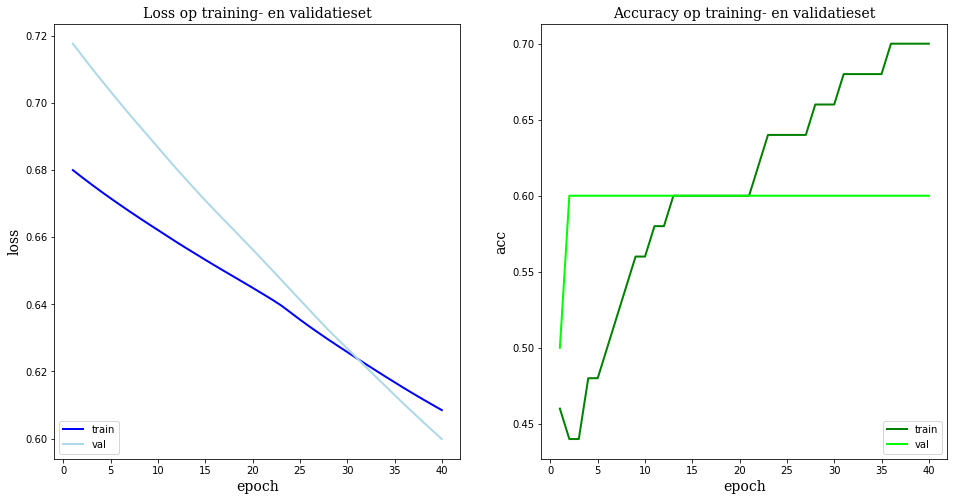

In [19]:
'font' = {'family': 'serif','color': 'black','weight': 'normal','size': 14,Your input doesn't contain any text in Dutch or any specific code to translate. Please provide the correct Dutch text or code that you want to translate into English.plt.figure(figsize=(16,8))
plt.subplot(1,2,1)plt.plot(epochs, loss, color="blue", label="train", linewidth=2)plt.plot(epochs, val_loss, color="lightblue", label="val", linewidth=2)plt.xticks(np.arange(0, 45, step=5))plt.title("Loss on training and validation set", fontdict=font)plt.xlabel("epoch", fontdict=font)plt.ylabel("loss", fontdict=font)plt.legend(loc="lower left")
plt.subplot(1,2,2)plt.plot(epochs, accuracy, color="green", label="train", linewidth=2)plt.plot(epochs, val_acc, color="lime", label="val", linewidth=2)plt.xticks(np.arange(0, 45, step=5))
plt.xlabel("epoch", fontdict=font)plt.ylabel("acc", fontdict=font)
plt.title("Accuracy on training and validation set", fontdict=font)plt.legend(loc="lower right")
plt.show()

What do you notice?<br>The model underfits / is optimal / overfits.

<div style='color: #690027;' markdown="1">
<h3>4.5 Testing the model</h3></div>

Test the model on the test set.<br>For this, the data must first be prepared, it must be standardized in the same way.

In [20]:
# load test settestset = pd.read_csv("testsetparabolen.dat")

In [21]:
# prepare datax1_test = testset["x"]x2_test = testset["y"]x1_test = np.array(x1_test)x2_test = np.array(x2_test)
y_test = testset["color"]y_test[y_test == 'blue'] = 0y_test[y_test == 'green'] = 1
x1_test = (x1_test - mean1) / std1x2_test = (x2_test - mean2) / std2X_test = np.stack((x1_test, x2_test), axis=1)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


The format of the `test points` is as desired.<br>When you use the `predict()` method, the model provides how sure it is that `testpunt` belongs to class '1'.<br>With the `predict_classes()` method, the model provides the class that it has decided.

In [22]:
# all test pointspredictions = network.predict_classes(X_test)for i in range(4):print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[1.0, 501.0] => 1 (expected 0)
[25.0, 1125.0] => 1 (expected 0)
[-20.0, 200.0] => 1 (expected 1)
[58.0, 3164.0] => 1 (expected 1)


<div style='color: #690027;' markdown="1">
<h2>5. Decision boundary</h2></div>

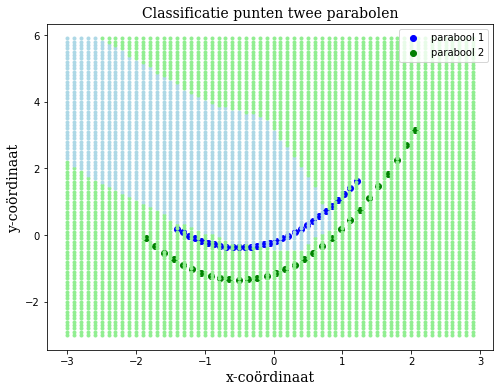

In [23]:
# decision boundary'font': {'family': 'serif','color':  'black','weight': 'normal',The input text is already in English.The input provided does not contain any Dutch text. You might have forgotten to provide the text you want to translate. Please provide the Dutch text you want to be translated to English.color = ["blue", "green"]type = ["parabola 1", "parabola 2"]                 

plt.figure(figsize=(8, 6))
for target in range(2):X_plot = X[y == target]    plt.scatter(X_plot[:, 0], X_plot[:, 1], marker='o', color=color[target], label=type[target])plt.title("Classification points two parabolas", fontdict=font)plt.xlabel("x-coordinate", fontdict=font)plt.ylabel("y-coordinate", fontdict=font)plt.legend(loc="upper right")
x1 = np.linspace(-2, 2, 40)x2 = np.linspace(-2, 5, 40)
# resolutionxx1 = np.arange(x1.min()-1, x1.max()+1, 0.1)xx2 = np.arange(x2.min()-1, x2.max()+1, 0.1)
for a in xx1:    for b in xx2:P = np.array([[a, b]])predictedclass = network.predict_classes(P)        if predictedclass == 0:color = "lightblue"        else:color = "lightgreen"        plt.plot(a, b, marker='.', color=color)
plt.show()

<div style='color: #690027;' markdown="1">
<h2>6. Improve model</h2></div>

Clear the notebook: **Kernel > Restart & Clear Output**<br>Train again with 100 epochs, and afterwards once with 400 epochs.<br>Possibly experiment with a larger or smaller learning rate.<br><br>Do you succeed in finding a high-performing model that does not overfit?

<div class="alert alert-box alert-info">
The data consists of points with two <b>features</b> and a corresponding <b>label</b>. The label can take on two values; there are two <b>classes</b>. A boundary between the classes is a <b>decision boundary</b>. <br>The model is a neural network with an <b>input layer</b>, a <b>hidden layer</b> with ReLU activation function, and an <b>output layer</b> with the sigmoid function as the activation function. <br>    
The classes are not linearly separable, but can still be separated from each other thanks to the <b>non-linear function ReLU</b>.</div>

<img src="../.images/cclic.png" alt="Banner" align="left" style="width:80px;"/><br><br>
KIKS notebook, see <a href="http://www.aiopschool.be">AI at School</a>, by F. Wyffels & N. Gesquière is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.